### EDA for old cars data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set = pd.read_csv("pre-owned cars.csv")
data_set.head(1)

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE


In [3]:
data_set = data_set.rename(columns=
                           {'brand': 'Brand', 
                            'model':'Model', 
                            'transmission':'Transmission Type',
                            'make_year': 'Model Year',
                            'reg_year': 'Year',
                            'fuel_type': 'Fuel Type',
                            'engine_capacity(CC)': 'Power',
                            'km_driven': 'Km Driven',
                            'ownership': 'Owner Type',
                            'price': 'Price',
                            'overall_cost': 'Overall Cost',
                            'has_insurance': 'Insurance',
                            'spare_key': 'Spare Key',
                            'reg_number': 'Vehicle No',
                            'title': 'Title'
                           })
data_set.head(1)

,Brand,Model,Transmission Type,Model Year,Year,Fuel Type,Power,Km Driven,Owner Type,Price,Overall Cost,Insurance,Spare Key,Vehicle No,Title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE


In [4]:
data_set.shape

(2806, 15)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              2805 non-null   object 
 1   Model              2805 non-null   object 
 2   Transmission Type  2805 non-null   object 
 3   Model Year         2805 non-null   float64
 4   Year               720 non-null    object 
 5   Fuel Type          2805 non-null   object 
 6   Power              2688 non-null   float64
 7   Km Driven          2805 non-null   float64
 8   Owner Type         2805 non-null   object 
 9   Price              2806 non-null   int64  
 10  Overall Cost       2805 non-null   float64
 11  Insurance          2805 non-null   object 
 12  Spare Key          2805 non-null   object 
 13  Vehicle No         2805 non-null   object 
 14  Title              2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 329.0+ KB


In [6]:
# Check total null/missing values for each column
data_set.isna().sum()

Brand                   1
Model                   1
Transmission Type       1
Model Year              1
Year                 2086
Fuel Type               1
Power                 118
Km Driven               1
Owner Type              1
Price                   0
Overall Cost            1
Insurance               1
Spare Key               1
Vehicle No              1
Title                   1
dtype: int64

In [7]:
# Calculate (%) of missing values
(data_set.isnull().sum() / (len(data_set))) * 100

Brand                 0.035638
Model                 0.035638
Transmission Type     0.035638
Model Year            0.035638
Year                 74.340699
Fuel Type             0.035638
Power                 4.205274
Km Driven             0.035638
Owner Type            0.035638
Price                 0.000000
Overall Cost          0.035638
Insurance             0.035638
Spare Key             0.035638
Vehicle No            0.035638
Title                 0.035638
dtype: float64

In [8]:
# Check data uniqueness
data_set.nunique()

Brand                  15
Model                 818
Transmission Type       2
Model Year             15
Year                  140
Fuel Type               4
Power                  44
Km Driven            2761
Owner Type              3
Price                1024
Overall Cost         2255
Insurance               1
Spare Key               2
Vehicle No            157
Title                1530
dtype: int64

In [9]:
# We can drop column those are adding any values
data_set = data_set.drop(['Title'], axis=1)
data_set.head(2)

,Brand,Model,Transmission Type,Model Year,Year,Fuel Type,Power,Km Driven,Owner Type,Price,Overall Cost,Insurance,Spare Key,Vehicle No
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C


In [10]:
data_set["Model Year"] = data_set["Model Year"].replace([np.inf, -np.inf], np.nan) # Replace inf with NaN first
data_set["Model Year"] = data_set["Model Year"].fillna(0).astype(int)
data_set["Model Year"] = data_set["Model Year"].astype('int64')
data_set["Model Year"].dtypes

dtype('int64')

In [11]:
# Calculate the car age

from datetime import date
current_date = date.today().year
data_set['Car Age'] = current_date - pd.to_datetime(data_set['Year']).dt.year
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              2805 non-null   object 
 1   Model              2805 non-null   object 
 2   Transmission Type  2805 non-null   object 
 3   Model Year         2806 non-null   int64  
 4   Year               720 non-null    object 
 5   Fuel Type          2805 non-null   object 
 6   Power              2688 non-null   float64
 7   Km Driven          2805 non-null   float64
 8   Owner Type         2805 non-null   object 
 9   Price              2806 non-null   int64  
 10  Overall Cost       2805 non-null   float64
 11  Insurance          2805 non-null   object 
 12  Spare Key          2805 non-null   object 
 13  Vehicle No         2805 non-null   object 
 14  Car Age            720 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 329.0+ KB


In [12]:
# Extract model and variant in 2 separate columns

data_set[['Model', 'Variant']] = data_set['Model'].str.split(' ', n=1, expand=True)

data_set.head()

,Brand,Model,Transmission Type,Model Year,Year,Fuel Type,Power,Km Driven,Owner Type,Price,Overall Cost,Insurance,Spare Key,Vehicle No,Car Age,Variant
0,Mahindra,Thar,Manual,2020,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,4.0,LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna,Manual,2018,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,7.0,1.6 VTVT SX
2,Tata,Harrier,Manual,2022,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,3.0,XT PLUS 2.0L KRYOTEC DARK EDITON
3,Honda,City,Automatic,2023,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2.0,1.5L I-VTE V CVT
4,Ford,Ecosport,Manual,2021,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,4.0,TITANIUM 1.5L DIESEL


In [13]:
print(data_set['Brand'].unique)
# print(data_set['Brand'].nunique)

<bound method Series.unique of 0       Mahindra
1        Hyundai
2           Tata
3          Honda
4           Ford
          ...   
2801        Ford
2802       Honda
2803     Hyundai
2804      Maruti
2805         NaN
Name: Brand, Length: 2806, dtype: object>


In [14]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Model Year,2806.0,2.017462e+03,3.821287e+01,0.0,2016.0,2018.0,2021.0,2.024000e+03
Power,2688.0,1.259028e+03,2.545048e+02,624.0,1194.0,1197.0,1462.0,2.694000e+03
Km Driven,2805.0,4.921548e+04,2.662693e+04,450.0,28540.0,45695.0,68182.0,1.439910e+05
Price,2806.0,1.342522e+06,3.554669e+07,163000.0,435000.0,594000.0,814000.0,1.883558e+09
Overall Cost,2805.0,1.349502e+04,6.040809e+03,4039.0,9267.0,12145.0,15760.0,4.733800e+04
Car Age,720.0,6.327778e+00,2.952721e+00,1.0,4.0,6.0,8.0,1.400000e+01


In [15]:
data_set.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,2805,15,Maruti,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,2805,91,Baleno,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission Type,2805,2,Manual,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model Year,2806.0,NaN,NaN,NaN,2017.461867,38.212873,0.0,2016.0,2018.0,2021.0,2024.0
Year,720,140,01-07-2021,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Type,2805,4,Petrol,2373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,2688.0,NaN,NaN,NaN,1259.02753,254.504798,624.0,1194.0,1197.0,1462.0,2694.0
Km Driven,2805.0,NaN,NaN,NaN,49215.477362,26626.932696,450.0,28540.0,45695.0,68182.0,143991.0
Owner Type,2805,3,1st owner,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,2806.0,NaN,NaN,NaN,1342521.73913,35546688.712403,163000.0,435000.0,594000.0,814000.0,1883558000.0


In [16]:
# Separate out numerical and categorical data
cat_cols = data_set.select_dtypes(include=['object']).columns
num_cols = data_set.select_dtypes(include=np.number).columns.tolist()

print('Categorical Data')
print(cat_cols)

print('Numerical Data')
print(num_cols)

Categorical Data
Index(['Brand', 'Model', 'Transmission Type', 'Year', 'Fuel Type',
       'Owner Type', 'Insurance', 'Spare Key', 'Vehicle No', 'Variant'],
      dtype='object')
Numerical Data
['Model Year', 'Power', 'Km Driven', 'Price', 'Overall Cost', 'Car Age']


### Univariate analysis
It can be done for both Categorical and Numerical variables

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot

Model Year
Skew : -52.5
Power
Skew : 1.21
Km Driven
Skew : 0.46
Price
Skew : 52.96
Overall Cost
Skew : 1.44
Car Age
Skew : 0.67


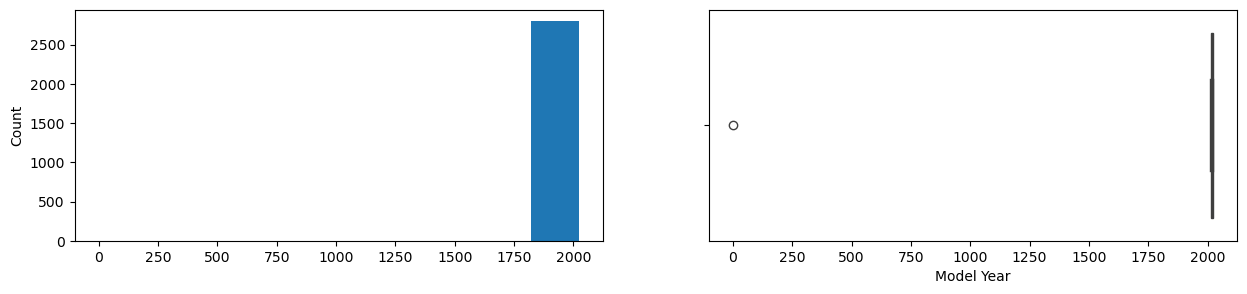

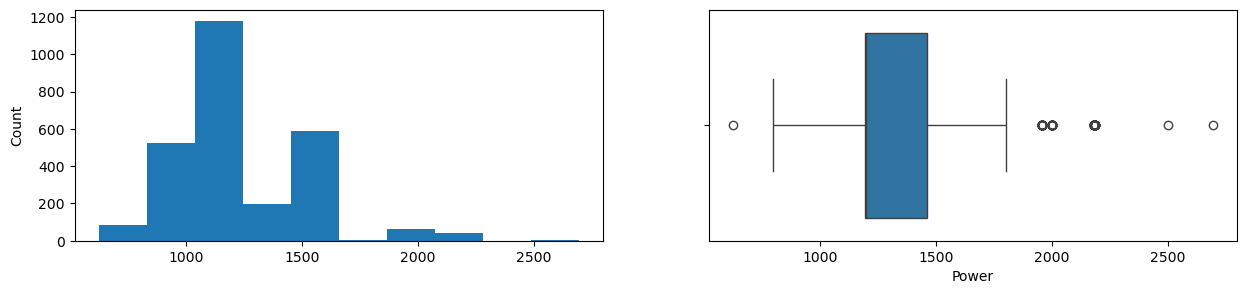

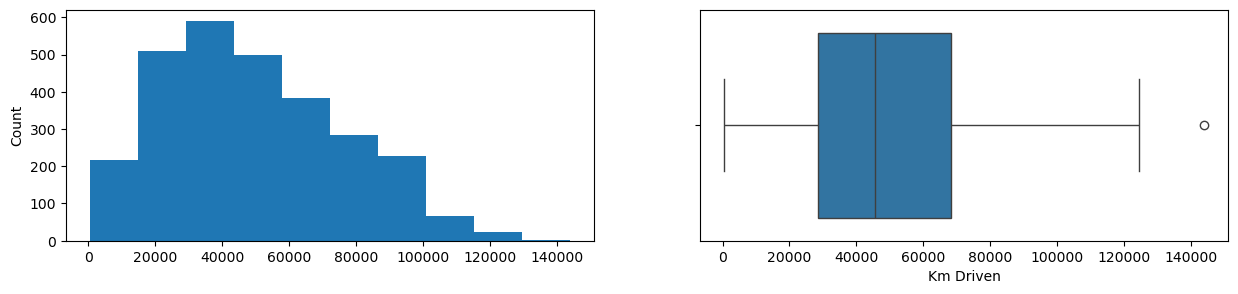

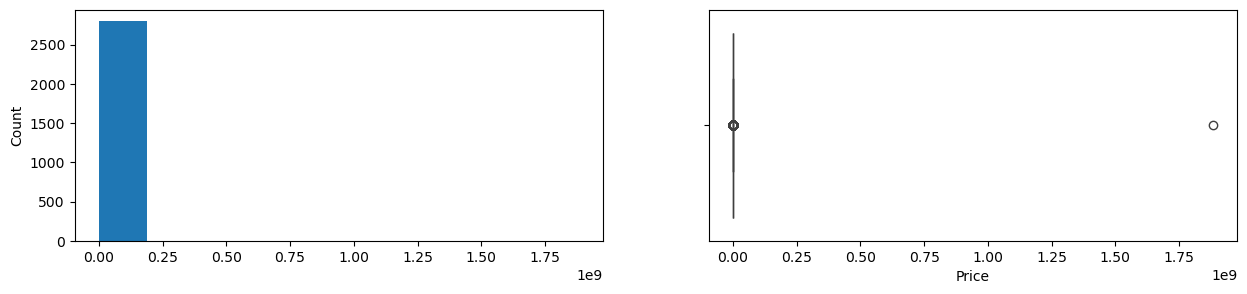

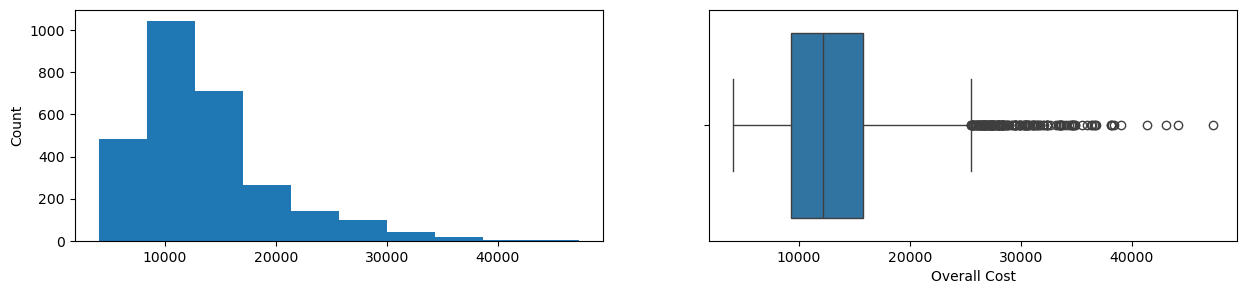

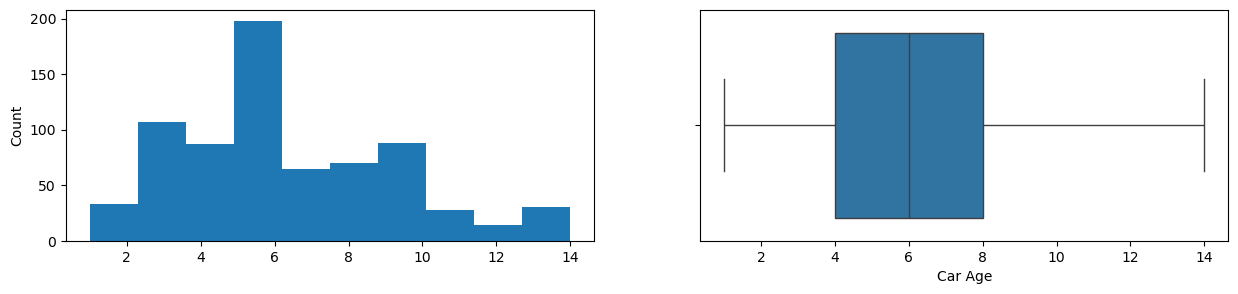

In [17]:
# First will plot histogram and bo plot to see data skewness and outliers

for col in num_cols:
    print(col)
    print('Skew :', round(data_set[col].skew(), 2))
    plt.figure(figsize=(15, 3))
    
    plt.subplot(1,2,1)
    data_set[col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_set[col])
    

In [18]:
state_short_codes = {'AR': 'Arunachal Pradesh',
'AS': 'Assam',
'BR': 'Bihar',
'CG': 'Chhattisgarh',
'GA': 'Goa',
'HP': 'Himachal Pradesh',
'JK': 'Jammu and Kashmir',
'JH': 'Jharkhand',
'KA': 'Karnataka',
'MH': 'Maharashtra',
'OD':'Odisha',
'PB':'Punjab',
'RJ':'Rajasthan',
'SK':'Sikkim',
'TN': 'Tamil Nadu',
'TG': 'Telangana',
'TR': 'Tripura',
'UP': 'Uttar Pradesh',
'UK': 'Uttarakhand',
'WB': 'West Bengal'
}
data_set['State'] = data_set['Vehicle No'].str[0: 2].map(state_short_codes)

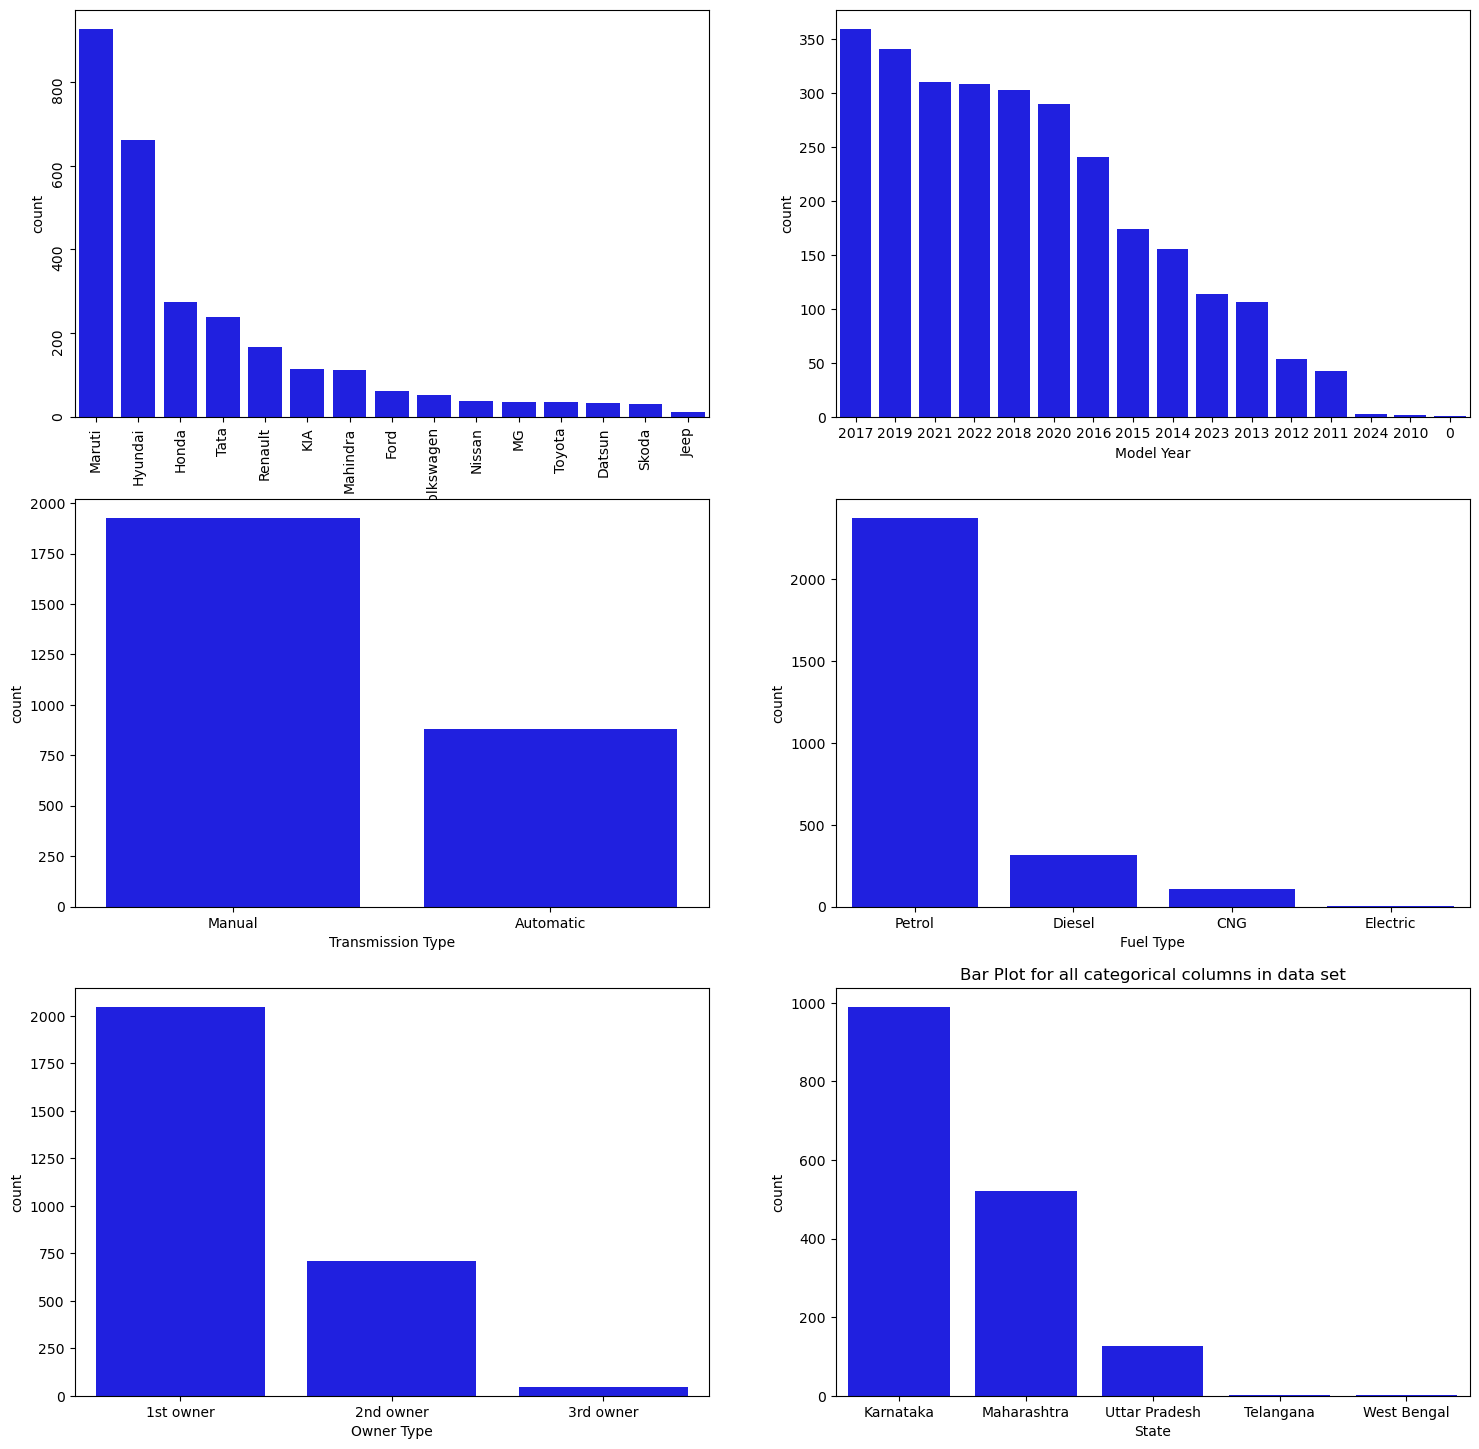

In [38]:
# Count plot will help us to track car price and car condition

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
plt.title("Bar Plot for all categorical columns in data set")

sns.countplot(ax = axes[0, 0], x = 'Brand', data = data_set, color = 'blue', 
              order = data_set['Brand'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Model Year', data = data_set, color = 'blue', 
              order = data_set['Model Year'].value_counts().index);

# sns.countplot(ax = axes[0, 1], y = 'Model', data = data_set, color = 'blue', 
#               order = data_set['Model'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Transmission Type', data = data_set, color = 'blue', 
              order = data_set['Transmission Type'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Fuel Type', data = data_set, color = 'blue', 
              order = data_set['Fuel Type'].value_counts().index);

sns.countplot(ax = axes[2, 0], x = 'Owner Type', data = data_set, color = 'blue', 
              order = data_set['Owner Type'].value_counts().index);

sns.countplot(ax = axes[2, 1], x = 'State', data = data_set, color = 'blue', 
              order = data_set['State'].value_counts().index);

axes[0][0].tick_params(labelrotation=90);

# sns.countplot(ax = axes[3, 0], x = 'Insurance', data = data_set, color = 'blue', 
#               order = data_set['Insurance'].value_counts().index);

In [23]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [32]:
log_transform(data_set,['Km Driven', 'Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              2805 non-null   object 
 1   Model              2805 non-null   object 
 2   Transmission Type  2805 non-null   object 
 3   Model Year         2806 non-null   int64  
 4   Year               720 non-null    object 
 5   Fuel Type          2805 non-null   object 
 6   Power              2688 non-null   float64
 7   Km Driven          2805 non-null   float64
 8   Owner Type         2805 non-null   object 
 9   Price              2806 non-null   int64  
 10  Overall Cost       2805 non-null   float64
 11  Insurance          2805 non-null   object 
 12  Spare Key          2805 non-null   object 
 13  Vehicle No         2805 non-null   object 
 14  Car Age            720 non-null    float64
 15  Variant            2805 non-null   object 
 16  State              1641 

<Axes: xlabel='Km Driven_log', ylabel='Density'>

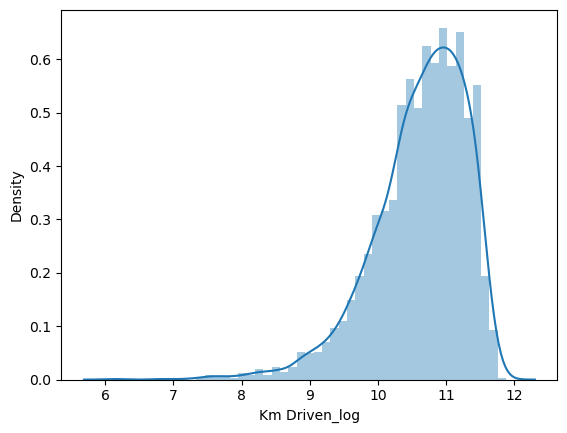

In [33]:
sns.distplot(data_set["Km Driven_log"], axlabel="Km Driven_log")

<Axes: xlabel='Price_log', ylabel='Density'>

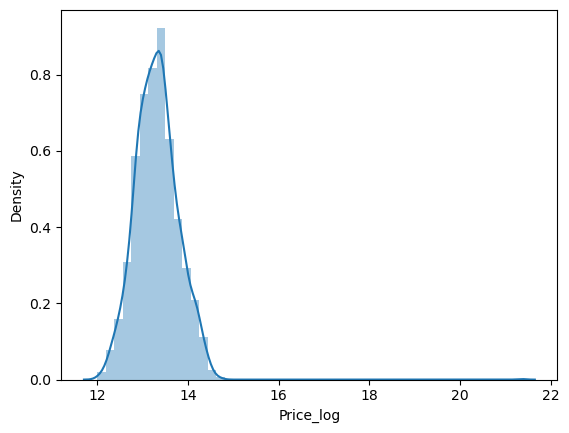

In [34]:
sns.distplot(data_set["Price_log"], axlabel="Price_log")

<Figure size 1300x1700 with 0 Axes>

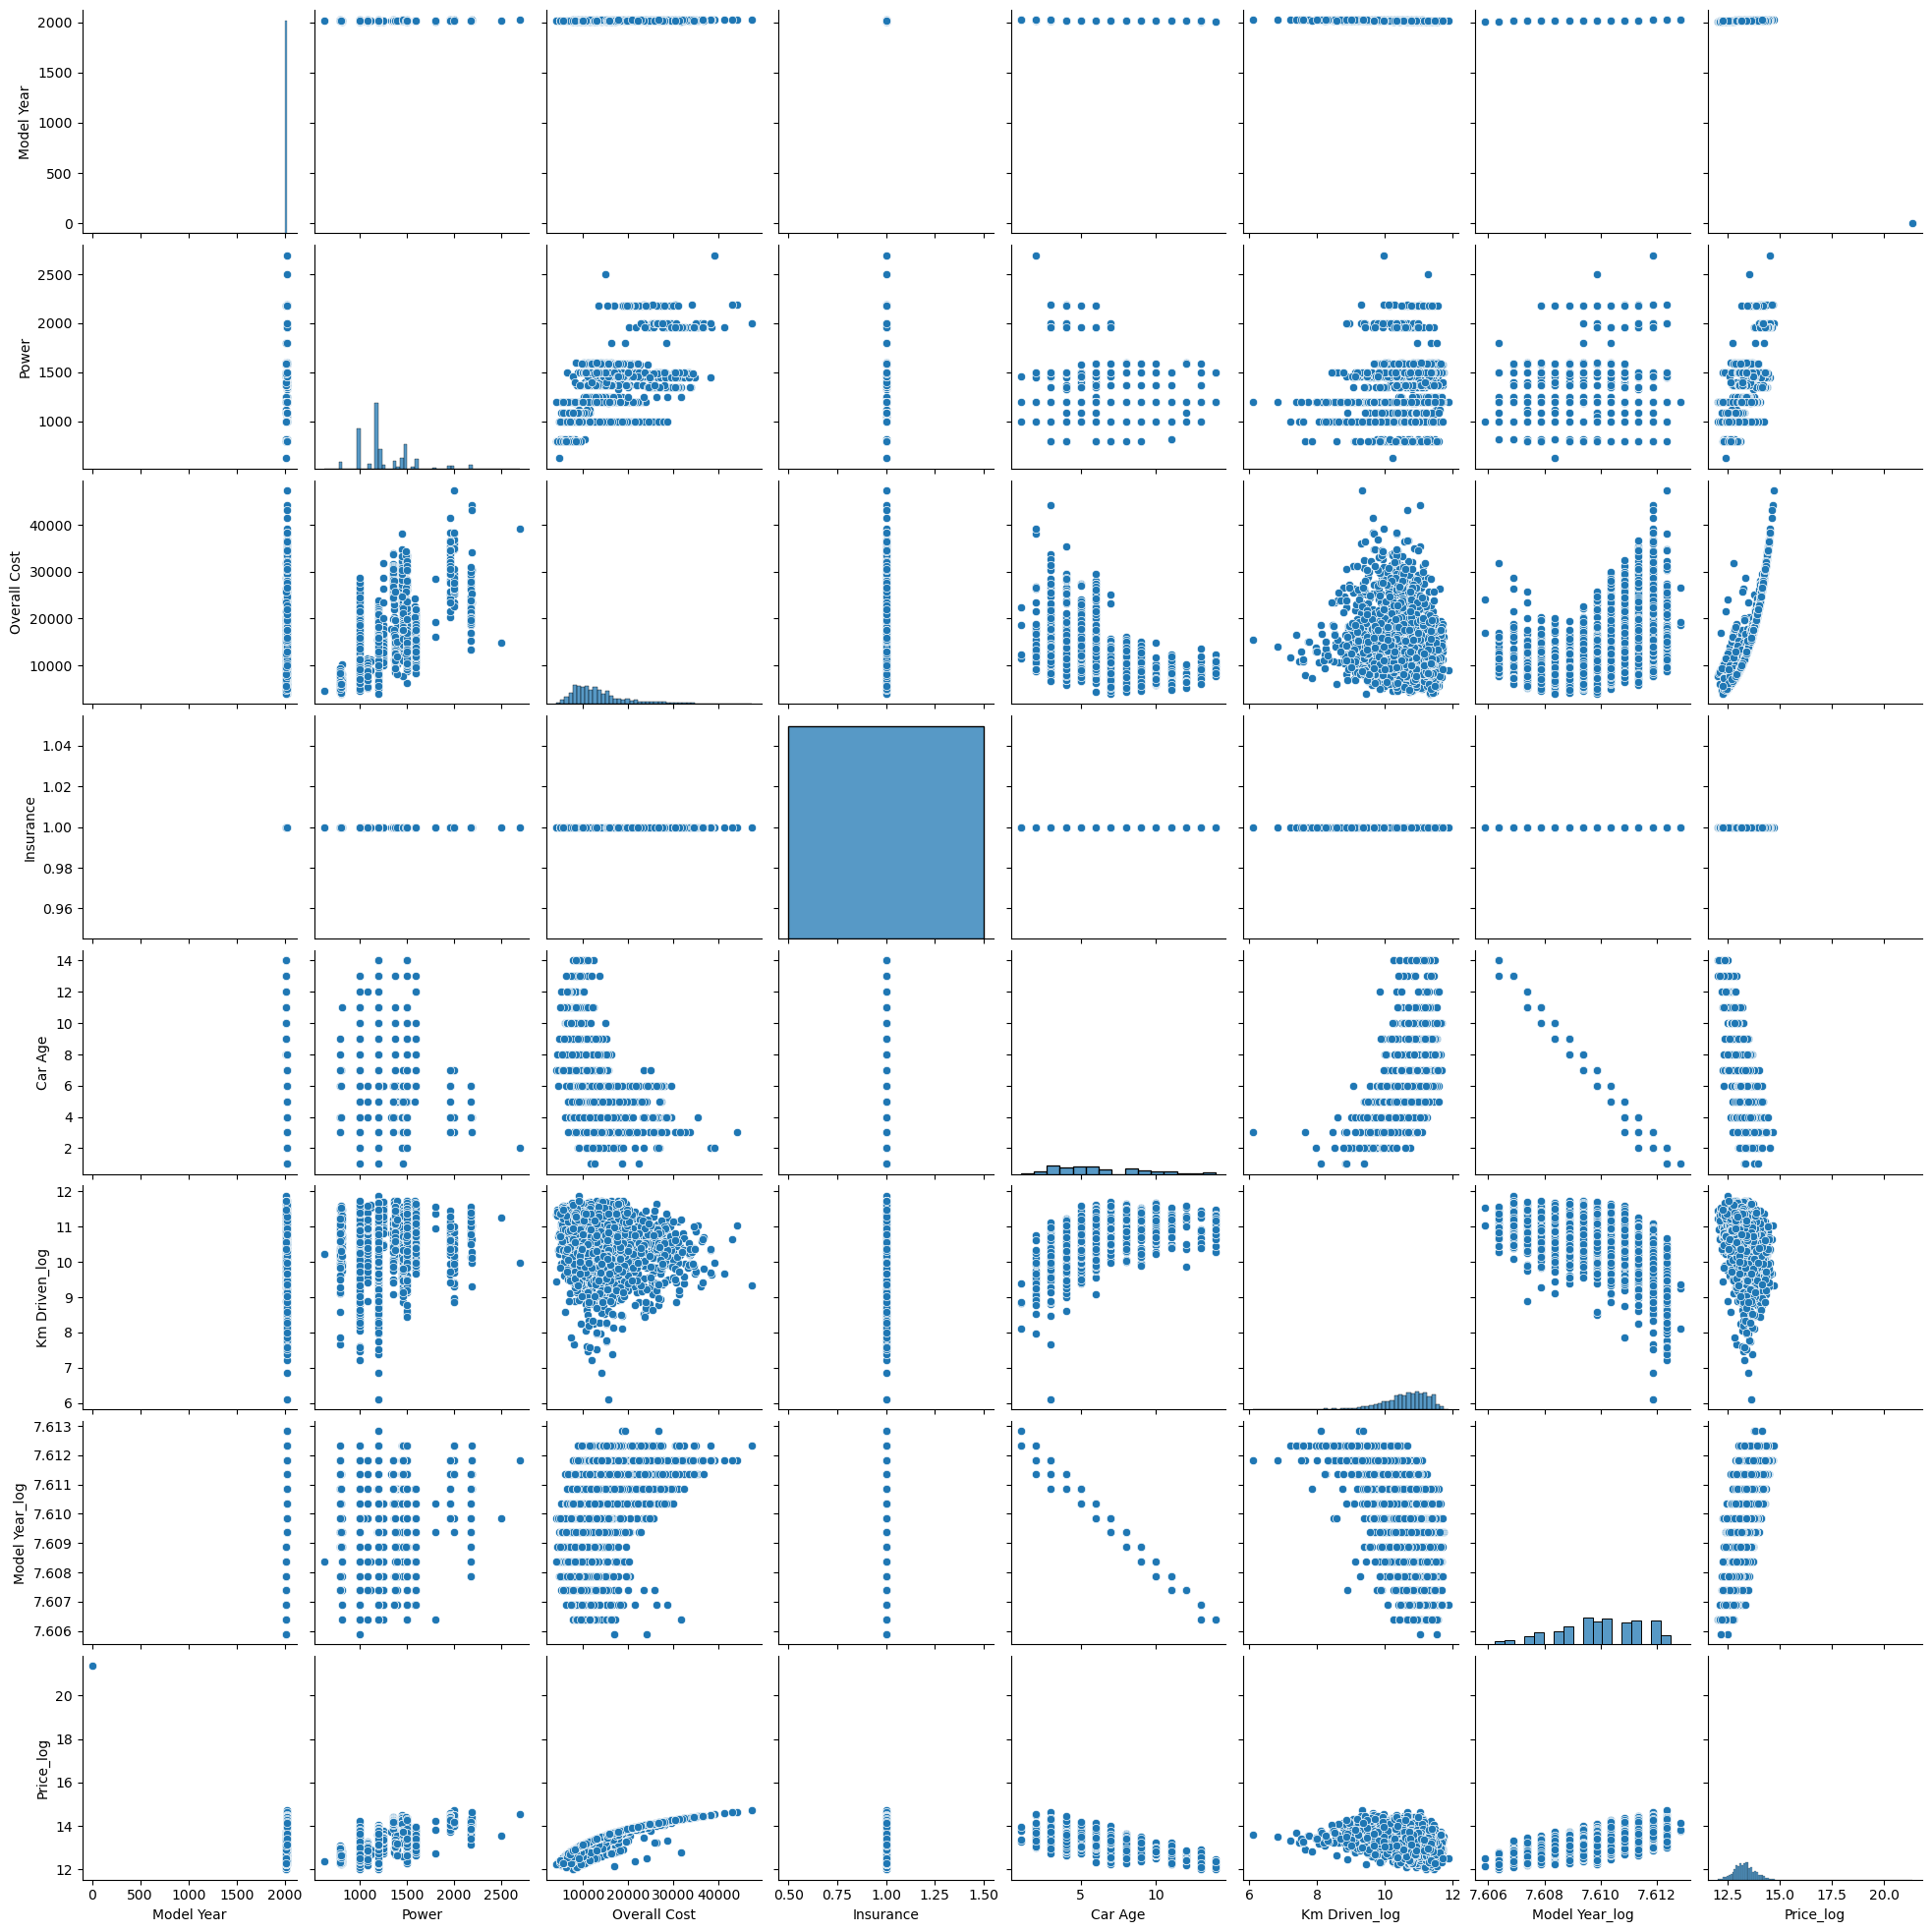

In [36]:
# Bivariate analysis

plt.figure(figsize=(13,17))
sns.pairplot(data=data_set.drop(['Km Driven','Price'],axis=1))

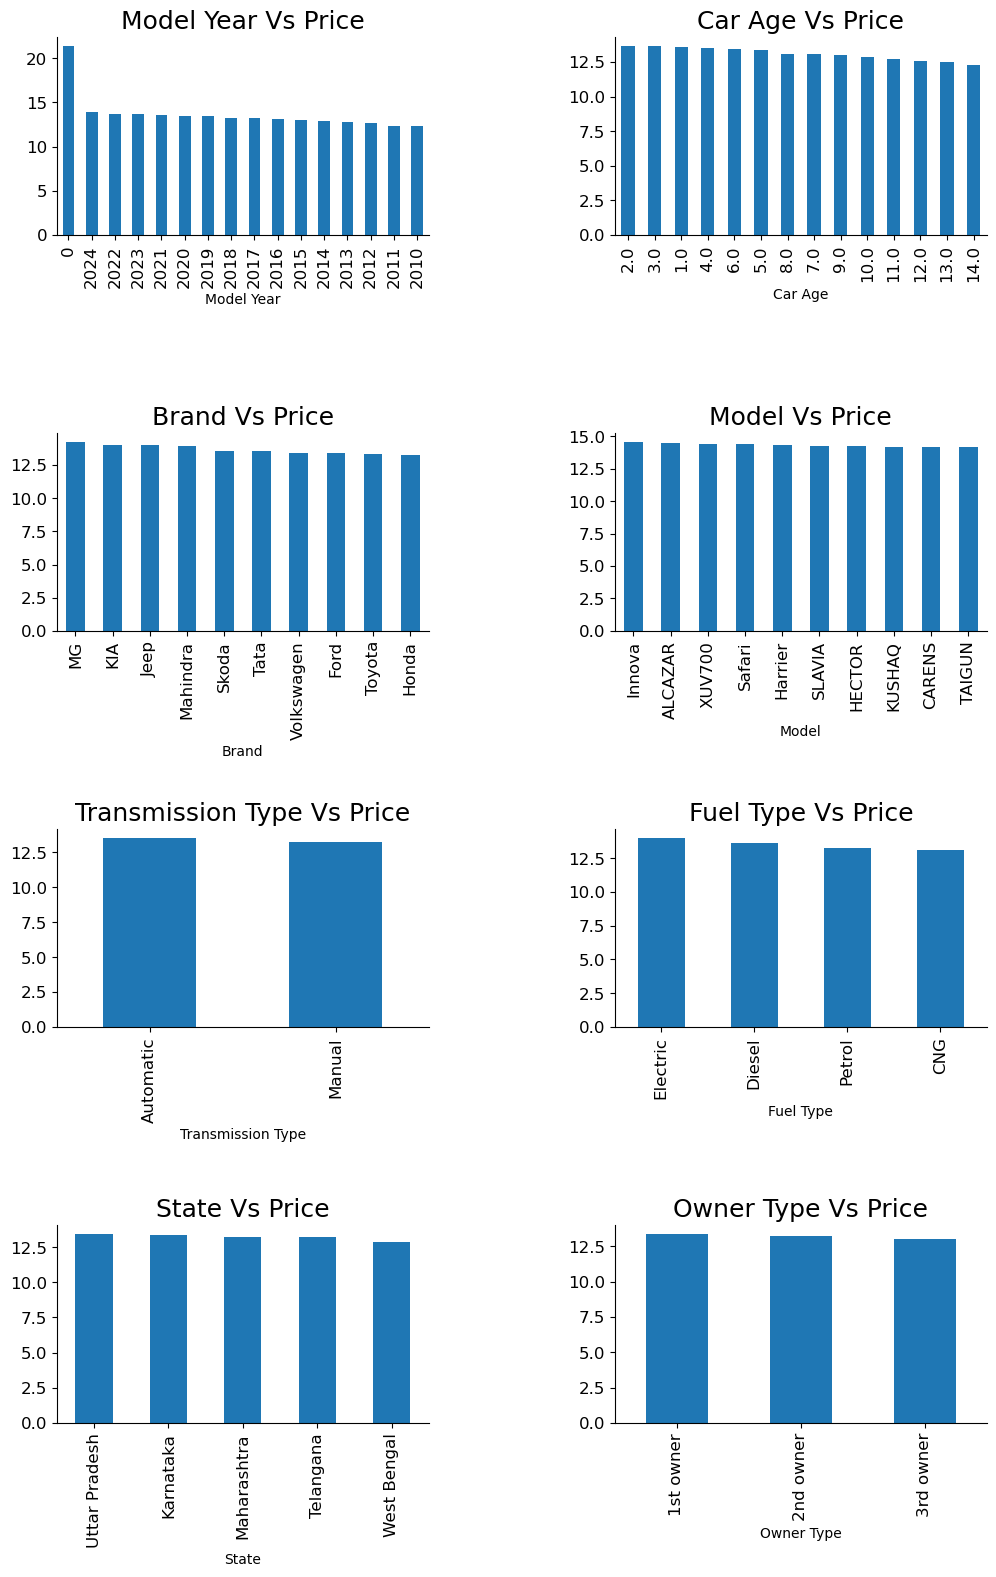

In [55]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data_set.groupby('Model Year')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Model Year Vs Price", fontsize=18)

data_set.groupby('Car Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Car Age Vs Price", fontsize=18)

data_set.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Brand Vs Price", fontsize=18)

data_set.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Model Vs Price", fontsize=18)

data_set.groupby('Transmission Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Transmission Type Vs Price", fontsize=18)

data_set.groupby('Fuel Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Fuel Type Vs Price", fontsize=18)

data_set.groupby('State')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("State Vs Price", fontsize=18)

data_set.groupby('Owner Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Owner Type Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

<Axes: >

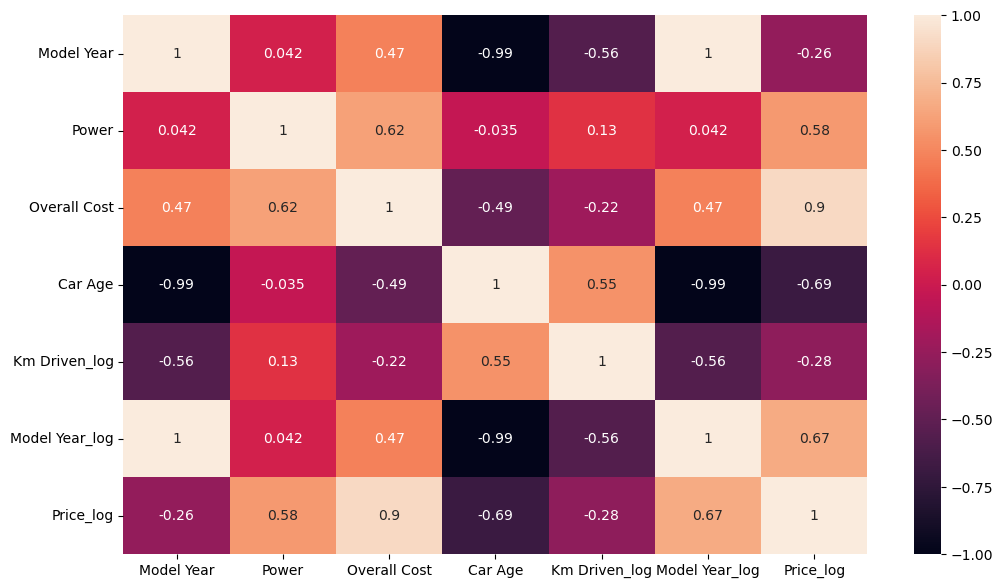

In [72]:
# Multivariate Analysis

plt.figure(figsize=(12, 7))
sns.heatmap(data_set.drop(['Km Driven','Price', 'Brand', 'Model', 'Transmission Type', 'Year', 'Fuel Type',
       'Owner Type', 'Insurance', 'Spare Key', 'Vehicle No', 'Variant', 'State'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)